<a href="https://www.kaggle.com/code/ehetshamshaukat/airline-passenger-satisfaction?scriptVersionId=104855160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data analysis

## importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly 
from plotly import offline 
from plotly import graph_objs as go
from plotly import express as px

## Importing and Reading data

In [2]:
dataset=pd.read_csv("../input/airline-passenger-satisfaction-1/airline_passenger_satisfaction.csv")
pd.set_option("display.max_columns",None)
dataset.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


## Dataset Information

In [3]:
dataset.shape

(129880, 24)

In [4]:
dataset.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
dataset.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [7]:
dataset.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'Corelation between features')

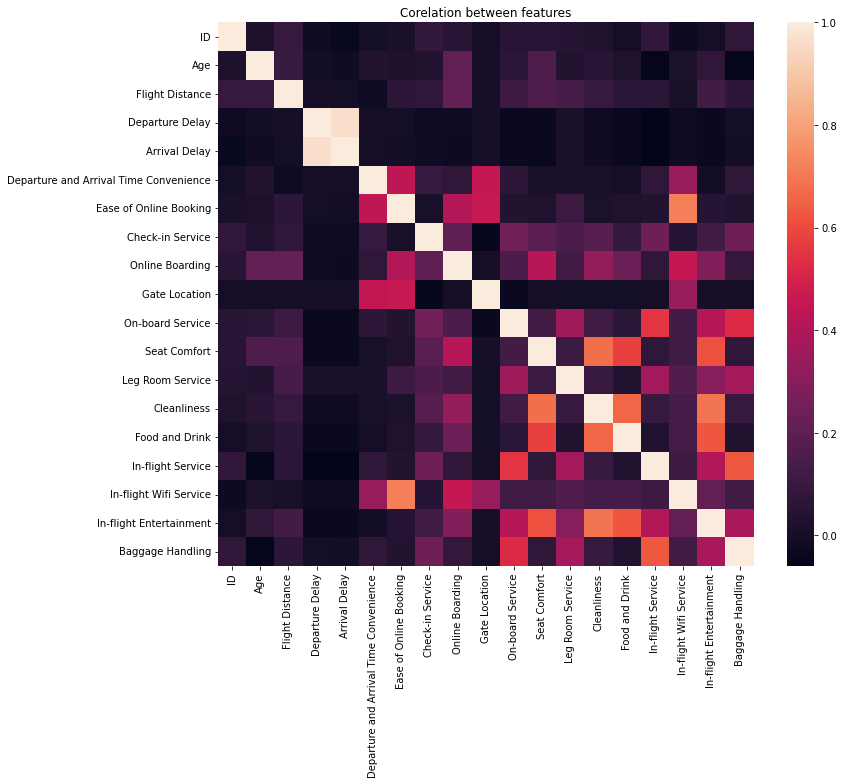

In [8]:
plt.figure(figsize=(12,10))
rel=dataset.corr()
sns.heatmap(rel)
plt.title("Corelation between features")

## Preprocessing

In [9]:
dataset.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<AxesSubplot:>

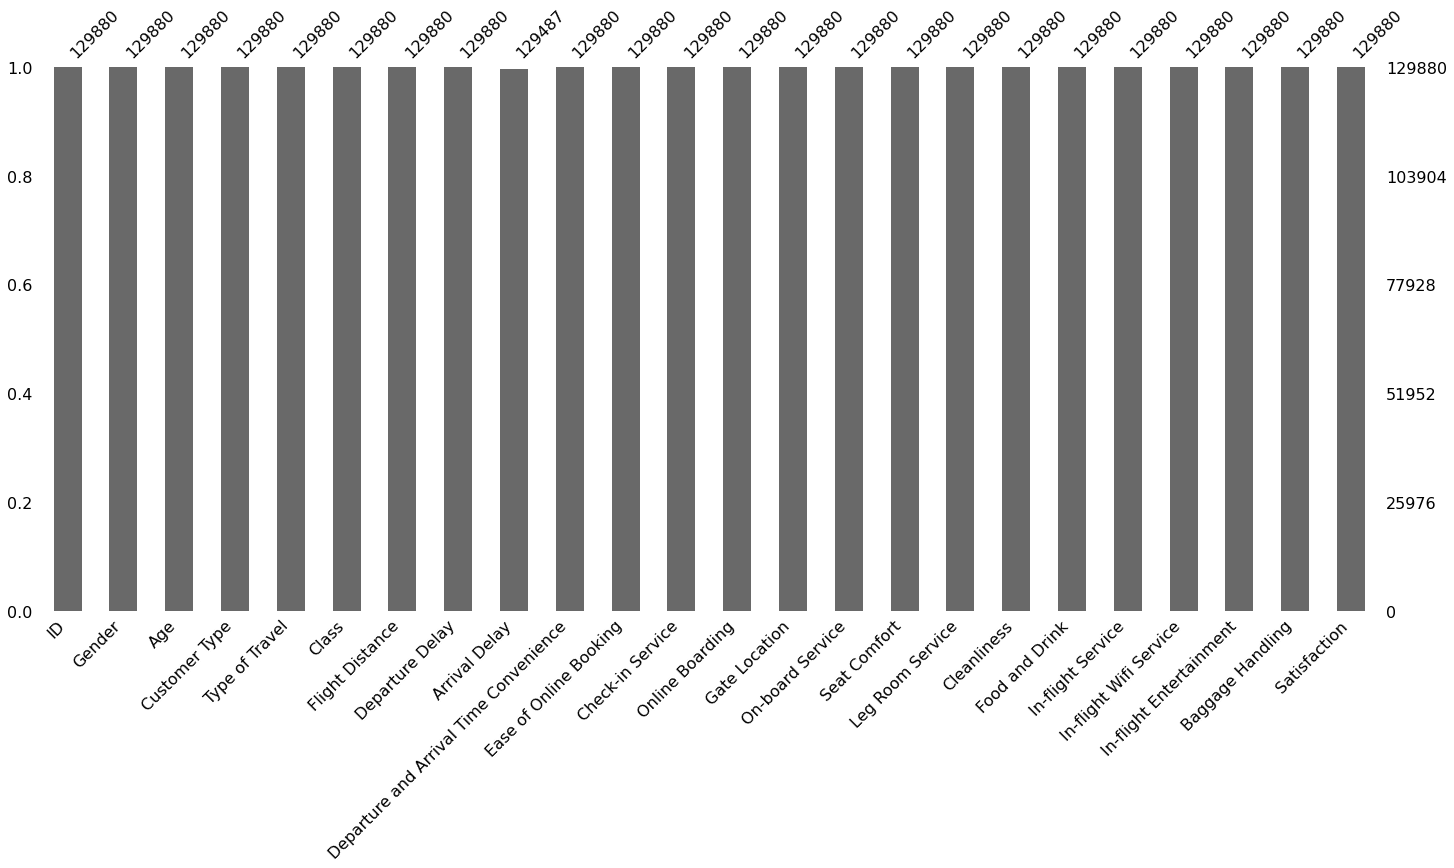

In [10]:
missingno.bar(dataset)

In [11]:
dataset["Arrival Delay"]=dataset["Arrival Delay"].fillna(0)

In [12]:
dataset.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [13]:
dataset.rename(columns={"Type of Travel":"Travel Reason"},inplace=True)

In [14]:
columns=dataset.columns
columns=columns[9:-1]
for x in columns:
    dataset[x].replace([1,2,3,4,5],["Very Unsatisfied","Unsatisfied","Neutral","Satisfied","Very Satisfied"],inplace=True)

## Reuseable Code

In [15]:
def create_pie(name,title,text):
    """ creating Pie chart using plotly with 3 argument name,title,text"""
    labels=name.index
    values=name.values
    trace0=go.Pie(values=values,labels=labels,hole=0.4,textposition="inside",textinfo="label+percent+value")
    data=[trace0]
    layout=dict(title=title,title_x=0.5,annotations=[dict(text=text,x=0.5,y=0.5,showarrow=False,font_size=14)])
    fig=dict(data=data,layout=layout)
    offline.iplot(fig)

In [16]:
def create_sunburst(df,path:list,values,title):
    """ Creating sunburst chart using plotly python"""
    fig=px.sunburst(df,path=path,values=values)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

## Advance analysis

### By gender

In [17]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
genders=dataset["Gender"].value_counts(sort=True)
genders

Female    65899
Male      63981
Name: Gender, dtype: int64

In [19]:
create_pie(genders,"Gender Distribution","Gender")

In [20]:
gender_vs_class=dataset.groupby(["Gender","Class"]).agg(Frequency=("Class","count")).reset_index()
gender_vs_class

,Gender,Class,Frequency
0,Female,Business,31263
1,Female,Economy,29670
2,Female,Economy Plus,4966
3,Male,Business,30897
4,Male,Economy,28639
5,Male,Economy Plus,4445


In [21]:
create_sunburst(gender_vs_class,["Gender","Class","Frequency"],"Frequency","Gender Vs. Distribution")

### By age

In [22]:
dataset["Age"].min()

7

In [23]:
dataset["Age"].max()

85

In [24]:
dataset.groupby("Gender").agg(max_age=("Age","max"),min_age=("Age","min"),average_age=("Age","mean")).reset_index()

,Gender,max_age,min_age,average_age
0,Female,85,7,39.293935
1,Male,85,7,39.565996


### By customer type

In [25]:
dataset["Customer Type"].unique()

array(['First-time', 'Returning'], dtype=object)

In [26]:
customer_type=dataset["Customer Type"].value_counts(sort=True)
customer_type

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [27]:
create_pie(customer_type,"Customer Type.","Customer")

In [28]:
customertype_vs_class=dataset.groupby(["Customer Type","Class"]).agg(Frequency=("Class","count")).reset_index()
customertype_vs_class

,Customer Type,Class,Frequency
0,First-time,Business,9231
1,First-time,Economy,13634
2,First-time,Economy Plus,915
3,Returning,Business,52929
4,Returning,Economy,44675
5,Returning,Economy Plus,8496


In [29]:
create_sunburst(customertype_vs_class,["Customer Type","Class","Frequency"],"Frequency","Customer Type And Class.")

In [30]:
customertype_class_gender=dataset.groupby(["Customer Type","Gender","Class"]).agg(Frequency=("Class","count")).reset_index()
customertype_class_gender

,Customer Type,Gender,Class,Frequency
0,First-time,Female,Business,4769
1,First-time,Female,Economy,7353
2,First-time,Female,Economy Plus,721
3,First-time,Male,Business,4462
4,First-time,Male,Economy,6281
5,First-time,Male,Economy Plus,194
6,Returning,Female,Business,26494
7,Returning,Female,Economy,22317
8,Returning,Female,Economy Plus,4245
9,Returning,Male,Business,26435


### By travel reason

In [31]:
dataset["Travel Reason"].unique()

array(['Business', 'Personal'], dtype=object)

In [32]:
travel_reason=dataset["Travel Reason"].value_counts(sort=True)
travel_reason

Business    89693
Personal    40187
Name: Travel Reason, dtype: int64

In [33]:
create_pie(travel_reason,"Travel Reason","Reason")

In [34]:
travelreason_vs_class=dataset.groupby(["Travel Reason","Class"]).agg(Frequency=("Class","count")).reset_index()
travelreason_vs_class

,Travel Reason,Class,Frequency
0,Business,Business,59487
1,Business,Economy,25304
2,Business,Economy Plus,4902
3,Personal,Business,2673
4,Personal,Economy,33005
5,Personal,Economy Plus,4509


In [35]:
create_sunburst(travelreason_vs_class,["Travel Reason","Class","Frequency"],"Frequency","Travel Reason and Class.")

### By class

In [36]:
dataset["Class"].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [37]:
flight_class=dataset["Class"].value_counts(sort=True)
flight_class

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

In [38]:
create_pie(flight_class,"Flight Class Distribution","Class.")

### By satisfaction

In [39]:
dataset["Satisfaction"].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [40]:
satisfied=dataset["Satisfaction"].value_counts(sort=True)
satisfied

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [41]:
create_pie(satisfied,"Satisfaction Distribution","Ratio.")

In [42]:
customer_vs_satisfaction=dataset.groupby(["Customer Type","Satisfaction"]).agg(Frequency=("Satisfaction","count")).reset_index()
customer_vs_satisfaction

,Customer Type,Satisfaction,Frequency
0,First-time,Neutral or Dissatisfied,18080
1,First-time,Satisfied,5700
2,Returning,Neutral or Dissatisfied,55372
3,Returning,Satisfied,50728


In [43]:
create_sunburst(customer_vs_satisfaction,["Customer Type","Satisfaction","Frequency"],"Frequency","Customer Vs. Satisfaction.")

In [44]:
class_vs_satisfaction=dataset.groupby(["Class","Satisfaction"]).agg(Frequency=("Satisfaction","count")).reset_index()
class_vs_satisfaction

,Class,Satisfaction,Frequency
0,Business,Neutral or Dissatisfied,18994
1,Business,Satisfied,43166
2,Economy,Neutral or Dissatisfied,47366
3,Economy,Satisfied,10943
4,Economy Plus,Neutral or Dissatisfied,7092
5,Economy Plus,Satisfied,2319


In [45]:
create_sunburst(class_vs_satisfaction,["Class","Satisfaction","Frequency"],"Frequency","Class Vs. Satisfaction.")

### By flight distance

In [46]:
dataset["Flight Distance"].max()

4983

In [47]:
dataset["Flight Distance"].min()

31